<font size="6">Calculate the Tolerance Factor<font>

In [11]:
import pandas as pd

In [12]:
# Load the antiperovskite data
antiperovskite_data_path = '../Data/1_data_with_raw_APs.csv'
antiperovskite_data = pd.read_csv(antiperovskite_data_path)

In [13]:
# Load the ionic radii data
ionic_radius_path = '../Data/Ionic_Radius.xlsx'
ionic_radius_data = pd.read_excel(ionic_radius_path)
ionic_radii_lookup = dict(zip(ionic_radius_data['Ion'], ionic_radius_data['Radius (pm)']))

In [14]:
# Define a function to calculate the tolerance factor
def calculate_tolerance_factor(row, radii_lookup):
    r_X = radii_lookup.get(row['X'], 0)
    r_A = radii_lookup.get(row['A'], 0)
    r_B = radii_lookup.get(row['B'], 0)
    r_A_d = radii_lookup.get(row['A_d'], 0) if pd.notna(row['A_d']) else 0
    
    numerator = r_X + row['A_w'] * r_A + row['A_dw'] * r_A_d if pd.notna(row['A_dw']) else r_X + row['A_w'] * r_A
    denominator = (2**0.5) * (r_X + r_B)
    
    return numerator / denominator if denominator != 0 else None

In [15]:
# Apply the function
antiperovskite_data['Tolerance_Factor'] = antiperovskite_data.apply(lambda row: calculate_tolerance_factor(row, ionic_radii_lookup), axis=1)

In [16]:
# Save to csv
output_path = '../Data/2_APs_with_Tolerance_Factor.csv'
antiperovskite_data.to_csv(output_path, index=False)

<font size="6">Screen based on the Tolerance Factor<font>

In [17]:
file_path = '../Data/2_APs_with_Tolerance_Factor.csv'
data = pd.read_csv(file_path)

# Screen Tolerance Factor for 0.7~1.2
filtered_data = data[(data['Tolerance_Factor'] >= 0.7) & (data['Tolerance_Factor'] <= 1.1)]

# Save to csv
filtered_file_path = '../Data/3_APs_with_Filtered_Tolerance_Factor.csv'
filtered_data.to_csv(filtered_file_path, index=False)

<font size="6">Plot the Tolerance Factor Distribution<font>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

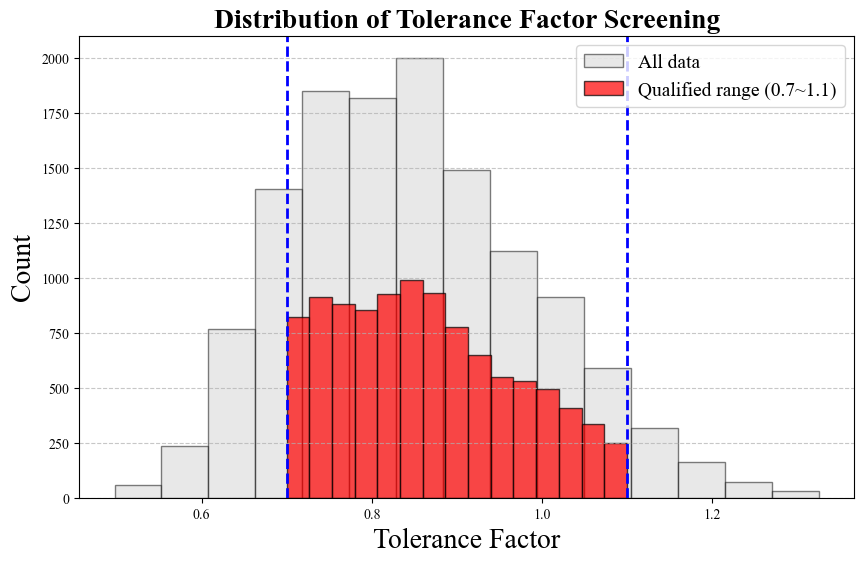

In [19]:
plt.rcParams["font.family"] = "Times New Roman"
# Load the dataset
file_path = '../Data/2_APs_with_Tolerance_Factor.csv'
data = pd.read_csv(file_path)

# Extract the tolerance factor data for plotting
tolerance_factor_data = data['Tolerance_Factor']

# Create a histogram, emphasizing the range 0.7 to 1.1 with boundary lines and additional formatting
plt.figure(figsize=(10, 6))

# Plot the full range of tolerance factors
plt.hist(tolerance_factor_data, bins=15, color='lightgray', edgecolor='black', alpha=0.5, label='All data')

# Highlight the specific range of tolerance factor (0.7 to 1.1)
highlight_data = tolerance_factor_data[(tolerance_factor_data >= 0.7) & (tolerance_factor_data <= 1.1)]
plt.hist(highlight_data, bins=15, color='red', edgecolor='black', alpha=0.7, label='Qualified range (0.7~1.1)')

# Add vertical lines at x = 0.7 and x = 1.1 to indicate boundaries
plt.axvline(x=0.7, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=1.1, color='blue', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Tolerance Factor', fontsize=20, fontname='Times New Roman')
plt.ylabel('Count', fontsize=20, fontname='Times New Roman')
plt.title('Distribution of Tolerance Factor Screening',  fontweight='bold',fontsize=20, fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})

# Add a complete frame line around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set tick parameters to use Times New Roman font
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.legend(fontsize='14')

# Save the plot as an image file
plt.savefig('../Figure/tolerance_factor_distribution.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()